# 📊 Project Overview  
This project aims to conduct an **Exploratory Data Analysis (EDA)** focused on the relationship between **Life Expectancy** and **Gross Domestic Product (GDP)** across six different countries, covering the years from **2000 to 2015**.

---

## 🎯 Objectives  
With this analysis, we intend to:

- 🔍 Determine whether there is a meaningful correlation between life expectancy and GDP;  
- 📈 Analyze trends and changes in life expectancy and GDP over time for each country;  
- 🌍 Compare these metrics between the countries to identify differences and similarities.

---
## ❓Project Questions 

- How do the rates of increase in life expectancy and GDP compare across countries over time?  
- Which country shows the fastest growth in life expectancy and GDP?  
- How do average life expectancies differ among countries with high, medium, and low GDP?  
- Are there any non-linear relationships between life expectancy and GDP?  
- How did life expectancy and GDP change during specific years (e.g., the 2008 financial crisis)?

---

## 📂 Dataset Description  
The dataset contains the following key columns:

- **Country:** Name of the country;  
- **Year:** The year the data was recorded;  
- **Life Expectancy at Birth (years):** Average expected lifespan at birth;  
- **GDP:** Gross Domestic Product expressed in U.S. dollars.




In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np



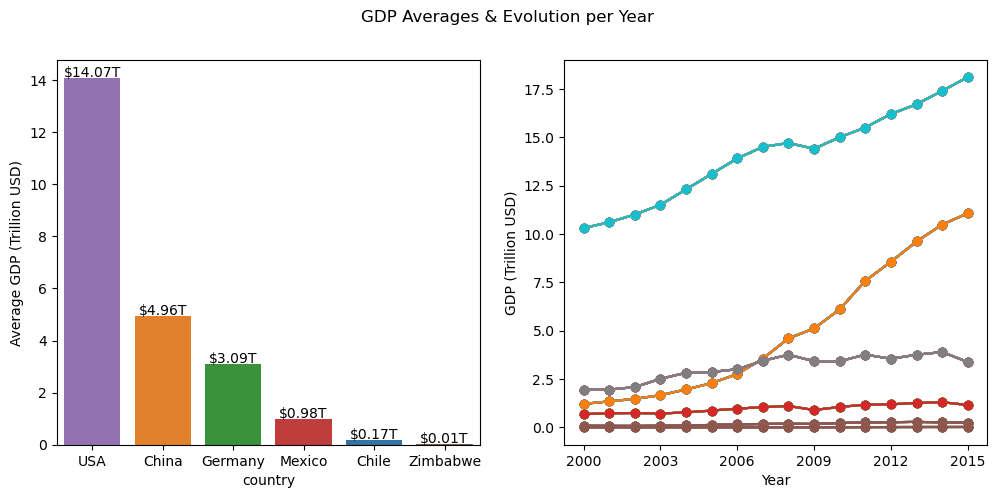

In [19]:
# Define figure grid and its title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle('GDP Averages & Evolution per Year')


# define custom palette
custom_palette = {
    'Chile': '#1f77b4',
    'China': '#ff7f0e',
    'Germany': '#2ca02c',
    'Mexico': '#d62728',
    'USA': '#9467bd',
    'Zimbabwe': '#8c564b'
}

# Find average GDP for each country
gdp_means = all_data.groupby('country')['gdp'].mean().sort_values(ascending=False)
# Bar plot
ax1 = plt.subplot(121)
sns.barplot(x=gdp_means.index, y=gdp_means.values, hue=gdp_means.index, palette=custom_palette)
# Change Y-axis' label to Trillion USD
ax1.set_ylabel('Average GDP (Trillion USD)')
yticks = ax1.get_yticks()
yticklabels = [round(tick / 1e12) for tick in yticks]
ax1.set(yticks=yticks[:-1], yticklabels=yticklabels[:-1])
# Include values for each bar
for label in ax1.get_xticklabels():
    xtick = label.get_position()[0]
    xlabel = label.get_text()
    ax1.text(x=xtick, y=gdp_means[xlabel] + 0.05e12, s=f"${gdp_means[xlabel] / 1e12 :.2f}T", horizontalalignment='center')


for country in all_data['country']:
    data = all_data[all_data['country'] == country]
    # Plot lines on second graph
    ax2 = plt.subplot(122)
    plt.plot(data.year, data.gdp, marker='o', label=country)

# Change Y-axis' labels and tick values
ax2.set_ylabel('GDP (Trillion USD)')
ax2.set_yticks(ticks=np.arange(0, 18.5e12, 2.5e12), labels=np.arange(0, 18.5, 2.5))
ax2.set_xlabel('Year')
ax2.set_xticks(range(2000, 2016, 3));

In [2]:
#import data and  familiarize with data set 

all_data = pd.read_csv("all_data.csv")
#print(all_data.head())

# observation the data 
print(all_data.describe())
print(all_data.dtypes)
print(all_data['Country'].unique())

# changing some details for easy usage / coding
all_data.columns = ['country','year','leb','gdp']
print(all_data.head())
# changing some details of data name united states of America = Usa
all_data.replace('United States of America', 'USA', inplace = True)

print(all_data.head())
print(all_data['country'].value_counts())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
  country  year   leb           gdp
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6

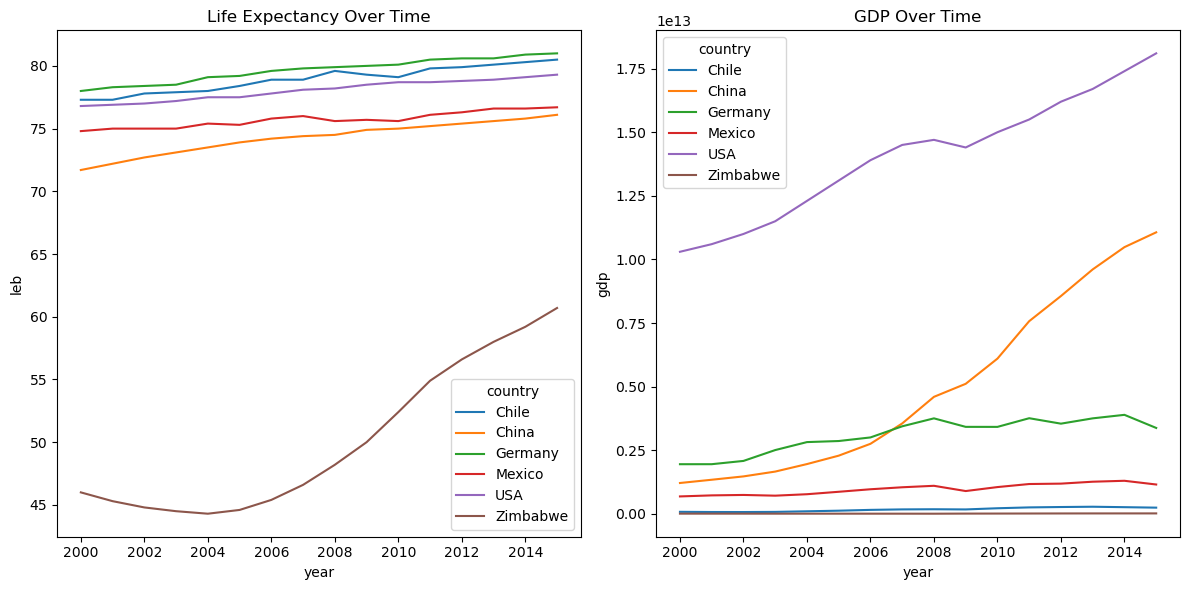

In [7]:

#How do the rates of increase in life expectancy and GDP compare across countries over time?
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.lineplot(data=all_data, x='year', y='leb', hue='country')
plt.title('Life Expectancy Over Time')

plt.subplot(1,2,2)
sns.lineplot(data=all_data, x='year', y='gdp', hue='country')
plt.title('GDP Over Time')

plt.tight_layout()
plt.show()



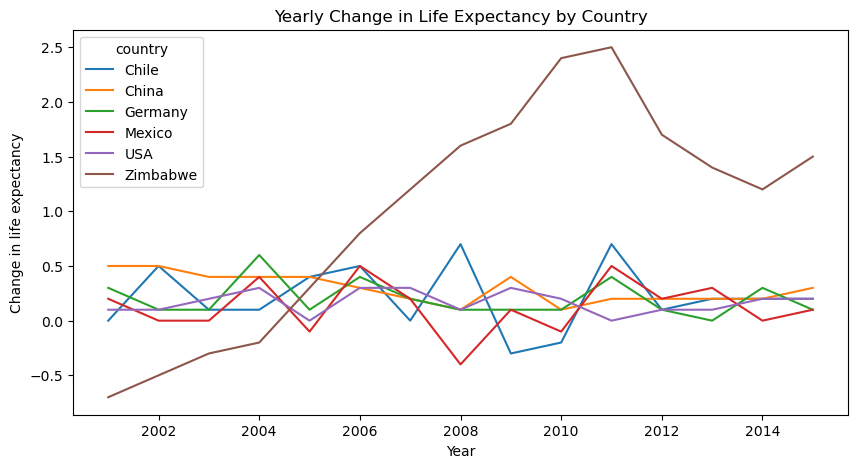

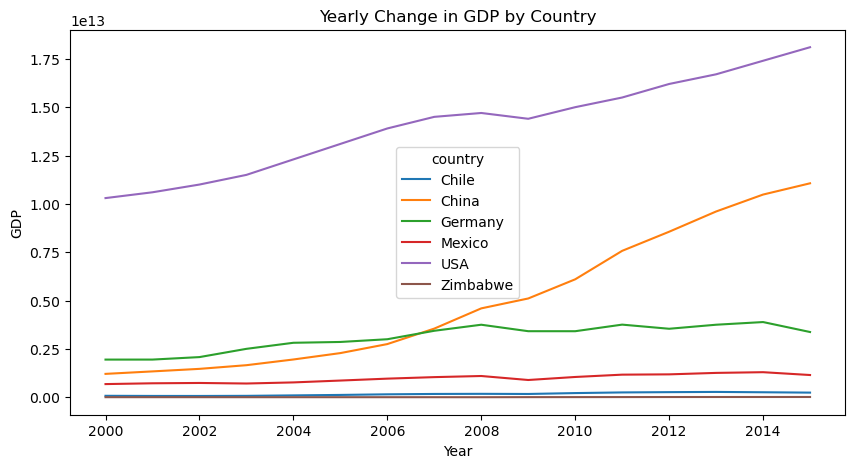

In [4]:
#Which country shows the fastest growth in life expectancy and GDP?

# sorted according to countries by year and grouped countries
all_data_sorted = all_data.sort_values(by=['country', 'year'])

# find the differences of leb and gdp 
all_data['diff_leb']= all_data_sorted.groupby('country')['leb'].diff()
all_data['diff_gdp']= all_data_sorted.groupby('country')['gdp'].diff()

# show in a chart the differences of life of expectancy by country
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='diff_leb', hue='country', data= all_data)
plt.title('Yearly Change in Life Expectancy by Country')
plt.xlabel('Year')
plt.ylabel('Change in life expectancy')
plt.show()

# show in a chart the differences of gdp
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='gdp', hue = 'country', data= all_data)
plt.title('Yearly Change in GDP by Country')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()



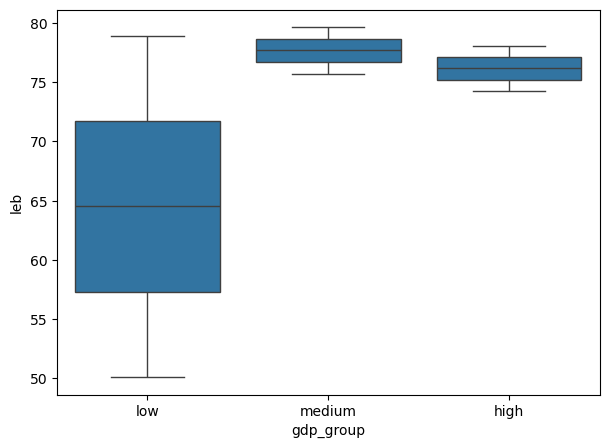

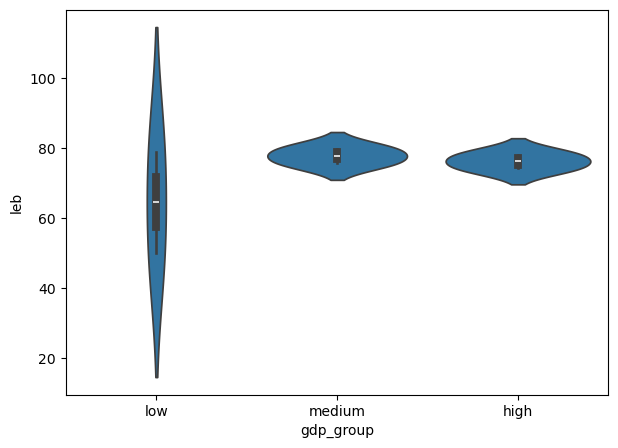

In [10]:
#How do average life expectancies differ among countries with high, medium, and low GDP?
avg_gdp_per_country = all_data.groupby('country')['gdp'].mean().reset_index()
#print(avg_gdp_per_country)

avg_leb_per_country = all_data.groupby('country')['leb'].mean().reset_index()
#print(avg_leb_per_country)

avg_gdp_per_country['gdp_group'] = pd.qcut(avg_gdp_per_country['gdp'], q = 3,  labels =['low','medium','high'])
#print(avg_gdp_per_country)
 

summary_all_data = avg_gdp_per_country.merge(avg_leb_per_country, on = 'country')
#print(summary_all_data)

# visualization of summary data 
plt.figure(figsize=(7,5))
sns.boxplot(x='gdp_group', y='leb', data=summary_all_data, order=['low', 'medium', 'high'])
 
plt.figure(figsize=(7,5))
sns.violinplot(x='gdp_group', y='leb', data=summary_all_data, order=['low', 'medium', 'high'])
plt.show()


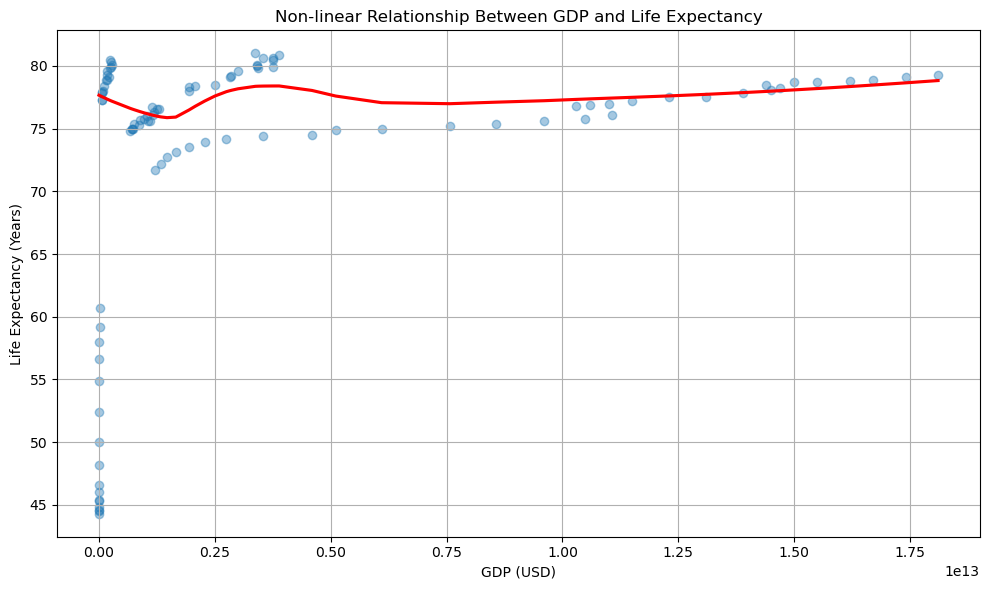

In [6]:
#Are there any non-linear relationships between life expectancy and GDP?  

plt.figure(figsize=(10, 6))

# Non-linear regression (LOWESS)
sns.regplot(
    x='gdp',
    y='leb',
    data=all_data,
    lowess=True,                # non-linear
    scatter_kws={'alpha': 0.4}, # transparent
    line_kws={'color': 'red'}   # nonlinear line color
)

plt.title('Non-linear Relationship Between GDP and Life Expectancy')
plt.xlabel('GDP (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()


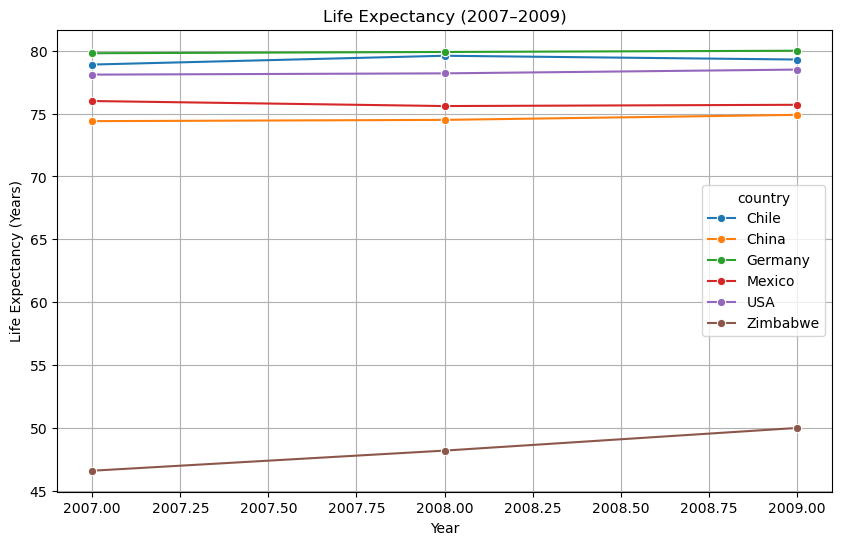

In [12]:
#How did life expectancy and GDP change during specific years (e.g., the 2008 financial crisis)?

crisis_years = all_data[all_data['year'].isin([2007, 2008, 2009])]
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='leb', hue='country', data=crisis_years, marker='o')
plt.title('Life Expectancy (2007–2009)')
plt.ylabel('Life Expectancy (Years)')
plt.xlabel('Year')
plt.grid(True)
plt.show()
